In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from glob import glob
import os, math, time
import sys
sys.path.insert(1, '/home/gusinskaia/psr_tools')

import numpy as np
import pickle

import astropy
from astropy import units as u, constants as const
from astropy.time import Time
from astropy.visualization import quantity_support

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib as mpl

from scipy.sparse.linalg import eigsh
from scipy.optimize import curve_fit
import scipy.linalg

import load_data as ld
import ds_psr as dsa
import fit_thth as fth
import models_thth as mth
import wsrt_fits as wf
import gbt_fits as gf
import ththmod as THTH

plt.rcParams['figure.dpi'] = 150

<Figure size 450x1200 with 0 Axes>

# All the data:

In [4]:
gbt_dir='/mnt/scratch-lustre/gusinskaia/triple_system/2021_GBT_dss/'
names=sorted(glob(gbt_dir+'*'))


actual_names=[x.split('/')[-1] for x in names]
mjds=[x.split('_')[0] for x in actual_names]
path_name=names[0].split(actual_names[0])[0]

print (mjds)
print (path_name)

['59297', '59299', '59324', '59363', '59399', '59403', '59426', '59434', '59464', '59496', '59498', '59518', '59545', '59574', '59646', '59647', '59673', '59699', '59722', '59732', '59747', '59747', '59770', '59797', '59827', '59855', '59886', '59915', '59919', '59919', '59919', '59943', '60055', '60341', '60349', '60367', '60397', '60401', '60423', '60449', '60454']
/mnt/scratch-lustre/gusinskaia/triple_system/2021_GBT_dss/


In [5]:
spec_59297=gf.load_new_gbt(59297)#too short
spec_59299=gf.load_new_gbt(59299)
spec_59324=gf.load_new_gbt(59324)
spec_59363=gf.load_new_gbt(59363)
spec_59399=gf.load_new_gbt(59399)
spec_59403=gf.load_new_gbt(59403)
spec_59426=gf.load_new_gbt(59426)#too short
spec_59434=gf.load_new_gbt(59434)#too short
spec_59464=gf.load_new_gbt(59464)#too short
spec_59496=gf.load_new_gbt(59496)
spec_59496=gf.load_new_gbt(59496)
spec_59498=gf.load_new_gbt(59498)
spec_59518=gf.load_new_gbt(59518)
spec_59545=gf.load_new_gbt(59545)
spec_59574=gf.load_new_gbt(59574)

spec_59647_fin=gf.load_new_gbt(59647, shrink=[1,1])
spec_59647_st=gf.load_new_gbt(59646, shrink=[1,1])
spec_59647=spec_59647_st+spec_59647_fin
spec_59647=spec_59647.shrink([10,1])

spec_59673=gf.load_new_gbt(59673)
spec_59699=gf.load_new_gbt(59699)
spec_59722=gf.load_new_gbt(59722)
spec_59732=gf.load_new_gbt(59732)

spec_59747_st=gf.load_new_gbt(59747, extention='_GBT_1400_wns_check01.npz', shrink=[1,1])
spec_59747_fin=gf.load_new_gbt(59747, extention='_GBT_1400_wns_check02.npz', shrink=[1,1])
spec_59747=spec_59747_st+spec_59747_fin
spec_59747=spec_59747.shrink([10,1])

spec_59770=gf.load_new_gbt(59770)
spec_59797=gf.load_new_gbt(59797)
spec_59827=gf.load_new_gbt(59827)
spec_59855=gf.load_new_gbt(59855)
spec_59886=gf.load_new_gbt(59886, shrink=[5,1])
spec_59915=gf.load_new_gbt(59915, shrink=[5,1])

spec_59919_st=gf.load_new_gbt(59919, extention='_GBT_1400_wns_check01.npz', shrink=[1,1])
spec_59919_mid=gf.load_new_gbt(59919, extention='_GBT_1400_wns_check02.npz', shrink=[1,1])
spec_59919_fin=gf.load_new_gbt(59919, extention='_GBT_1400_wns_check03.npz', shrink=[1,1])
spec_59919_stmid=spec_59919_st+spec_59919_mid
spec_59919=spec_59919_stmid+spec_59919_fin

spec_59943=gf.load_new_gbt(59943)
spec_60055=gf.load_new_gbt(60055)
spec_60341=gf.load_new_gbt(60341)
spec_60349=gf.load_new_gbt(60349)
spec_60397=gf.load_new_gbt(60397)

(238, 2048)
(2032, 2048)
(345, 2048)
(263, 2048)
(253, 2048)
(2231, 2048)
(246, 2048)
(204, 2048)
(151, 2048)
(246, 2048)
(246, 2048)
(1848, 2048)
(205, 2048)
(234, 2048)
(2452, 2048)
(2474, 2048)
(155, 2048)
(271, 1792) (271,)


NotImplementedError: `interp2d` has been removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
https://scipy.github.io/devdocs/tutorial/interpolate/interp_transition_guide.html


In [74]:
spec_59943=gf.load_new_gbt(59943)
spec_60055=gf.load_new_gbt(60055)

(397, 2048)
(357, 2048)


In [69]:
spec_60341=gf.load_new_gbt(60341)
spec_60349=gf.load_new_gbt(60349)
spec_60397=gf.load_new_gbt(60397)

(1823, 2048)
(408, 2048)
(417, 2048)


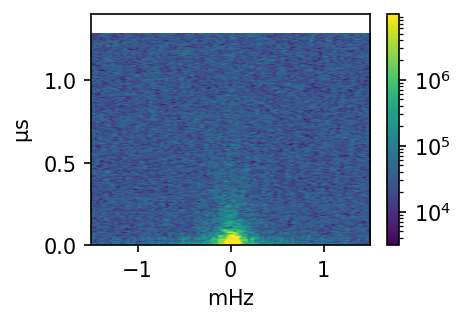

In [75]:
spec_60341.plot_ss()

In [6]:
spec_60401=gf.load_new_gbt(60401)
spec_60423=gf.load_new_gbt(60423)
spec_60449=gf.load_new_gbt(60449)
spec_60454=gf.load_new_gbt(60454)

(1845, 2048)
(335, 2048)
(478, 2048)
(1698, 2048)


In [77]:
data=np.load('/mnt/scratch-lustre/gusinskaia/triple_system/2021_GBT_dss/60454_GBT_1400_wns_check.npz')
ds=data['ds']


In [81]:
ds.shape

(1698, 2048)

In [100]:
data=np.load('/mnt/scratch-lustre/gusinskaia/triple_system/2021_GBT_dss/60454_GBT_1400_wns_check.npz')
full_time=(data['mjd'][1]-data['mjd'][0])*(24.*3600.)
ntbin=full_time/data['ds'].shape[0]
ds=data['ds']
ns=data['noise']
a_t = (np.arange(data['ds'].shape[0]) * ntbin * u.s)
a_f = np.linspace(data['c_fr']+data['bw_fr']/2,data['c_fr']-data['bw_fr']/2, data['ds'].shape[1]) * u.MHz
#ds[:,30:85]=np.mean(ds)
my_spec=dsa.Spec(I=ds[1150:,::-1],t=a_t[1150:],f=a_f,stend=data['mjd'], nI=ns, tel='GBT',
             psr='J0337+1715')

In [103]:
data=np.load('/mnt/scratch-lustre/gusinskaia/triple_system/2021_GBT_dss/60554_GBT_1400_wns_check.npz')
full_time=(data['mjd'][1]-data['mjd'][0])*(24.*3600.)
ntbin=full_time/data['ds'].shape[0]
ds=data['ds']
ns=data['noise']
a_t = (np.arange(data['ds'].shape[0]) * ntbin * u.s)
a_f = np.linspace(data['c_fr']+data['bw_fr']/2,data['c_fr']-data['bw_fr']/2, data['ds'].shape[1]) * u.MHz
#ds[:,30:85]=np.mean(ds)
my_spec554=dsa.Spec(I=ds[:,::-1],t=a_t[:],f=a_f,stend=data['mjd'], nI=ns, tel='GBT',
             psr='J0337+1715')

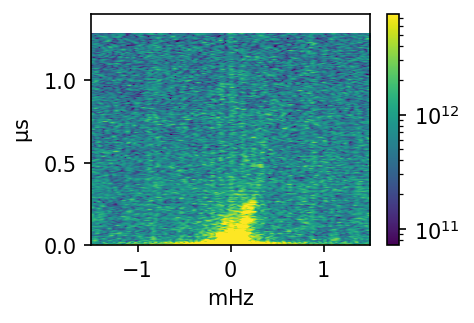

In [105]:
my_spec554.plot_ss()

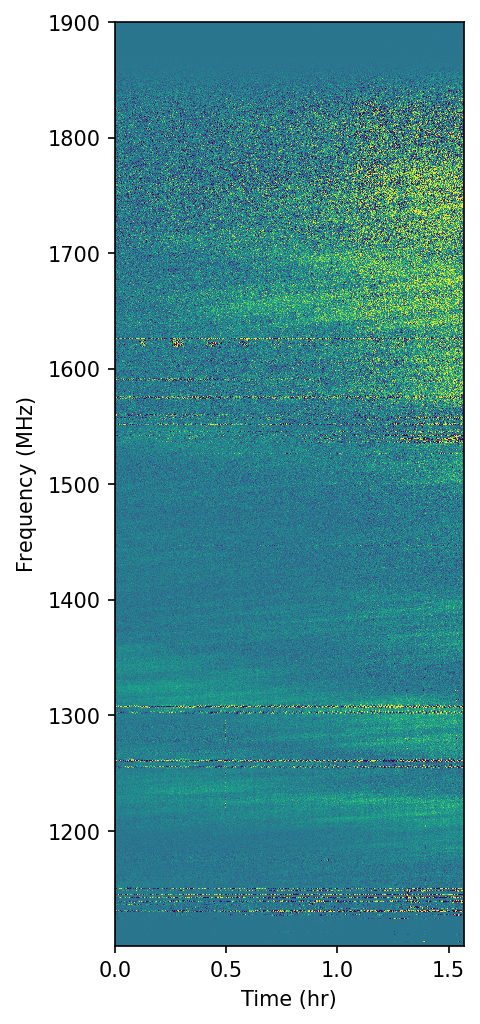

In [101]:
my_spec.plot_ds()

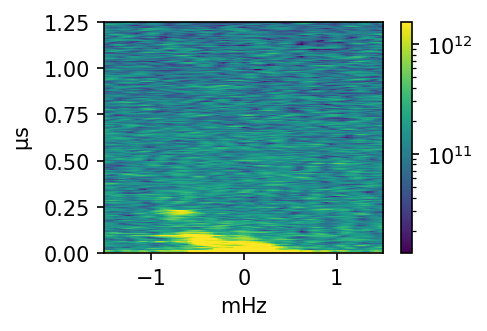

In [102]:
my_spec.plot_ss(tau_lim=[0,1.25])

In [ ]:
spec_60554.plot_ss(tau_lim=[0,1.25])

In [ ]:
my_spec=dsa.Spec(I=ds,t=a_t,f=a_f,stend=data['mjd'], nI=ns, tel='GBT',
             psr='B1534+12')

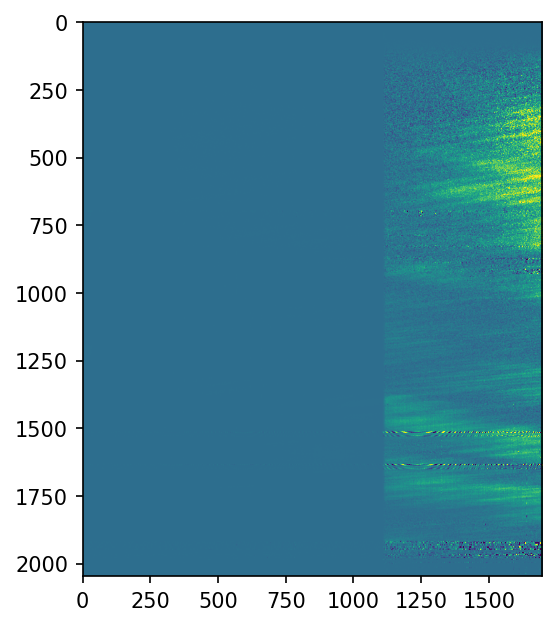

In [80]:
vmin, vmax=np.percentile(ds, [1,99])
plt.imshow(ds.T, vmin=vmin, vmax=vmax)

In [ ]:
myspec=dsa.Spec()

In [6]:
spec_60401=gf.load_new_gbt(60401)
spec_60423=gf.load_new_gbt(60423)
spec_60449=gf.load_new_gbt(60449)
spec_60454=gf.load_new_gbt(60454)

(1845, 2048)
(335, 2048)
(478, 2048)
(1698, 2048)


In [91]:
spec_60554=gf.load_new_gbt(60554, shrink=[1,1])
spec_60555=gf.load_new_gbt(60555)

(1739, 2048)
(473, 2048)


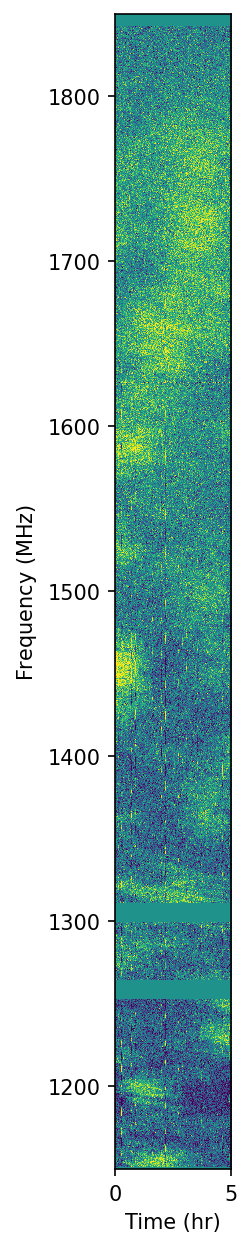

In [92]:
spec_60554.plot_ds(figsize=[1,10])

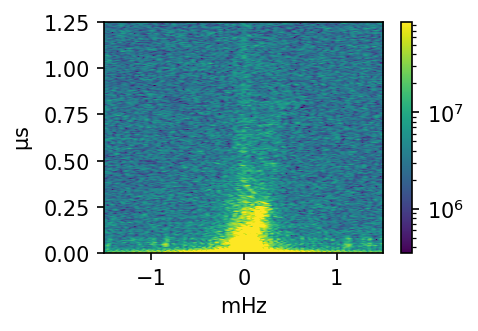

In [94]:
spec_60554.plot_ss(tau_lim=[0,1.25])

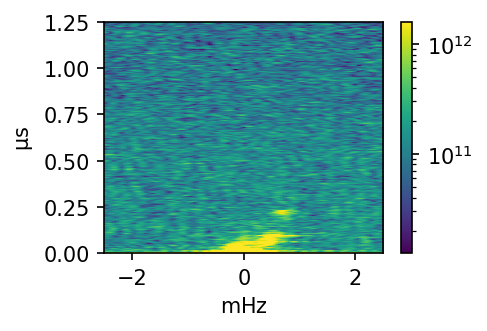

In [96]:
my_spec.plot_ss(tau_lim=[0,1.25], fd_lim=[-2.5,2.5])

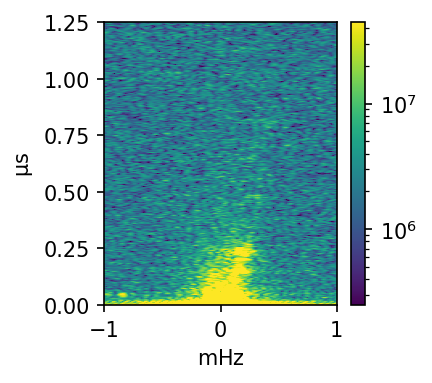

In [97]:
spec_60554.select(freq_sel=[1320*u.MHz,1800*u.MHz]).plot_ss(tau_lim=[0, 1.25], fd_lim=[-1,1],figsize=(2.5,2.45), cb=True)

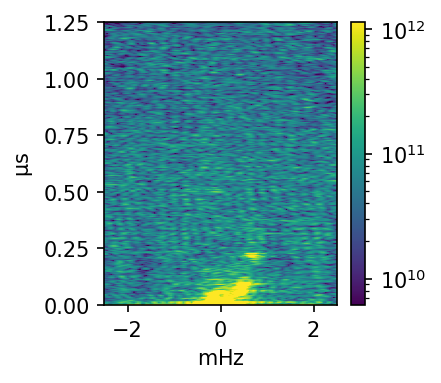

In [99]:
my_spec.select(freq_sel=[1320*u.MHz,1800*u.MHz]).plot_ss(tau_lim=[0, 1.25], fd_lim=[-2.5,2.5],figsize=(2.5,2.45), cb=True)

In [46]:
spec_60555

<Dynamic spectrum: Dur: 1.36 hr, Freq: 1149.83 - 1850 MHz, MJD: 60555.43, PSR: PSRJ0337+1715, Tel: GBT, w noise>

In [47]:
5.03/1.36

3.6985294117647056

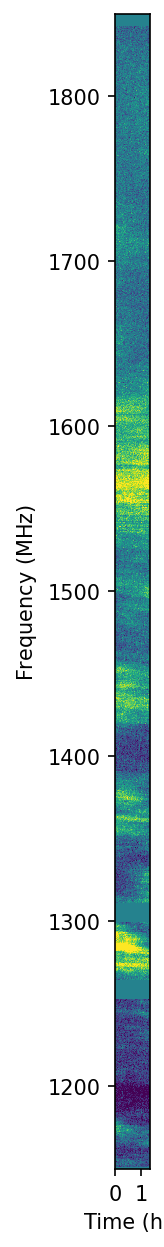

In [40]:
spec_60555.plot_ds(figsize=[0.3,10])

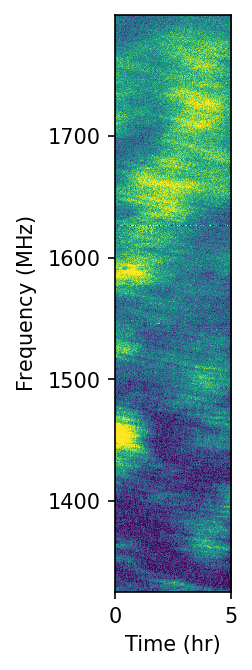

In [44]:
spec_60554.select(freq_sel=[1325*u.MHz,1800*u.MHz]).plot_ds(figsize=[1,5])

Text(0, 0.5, '')

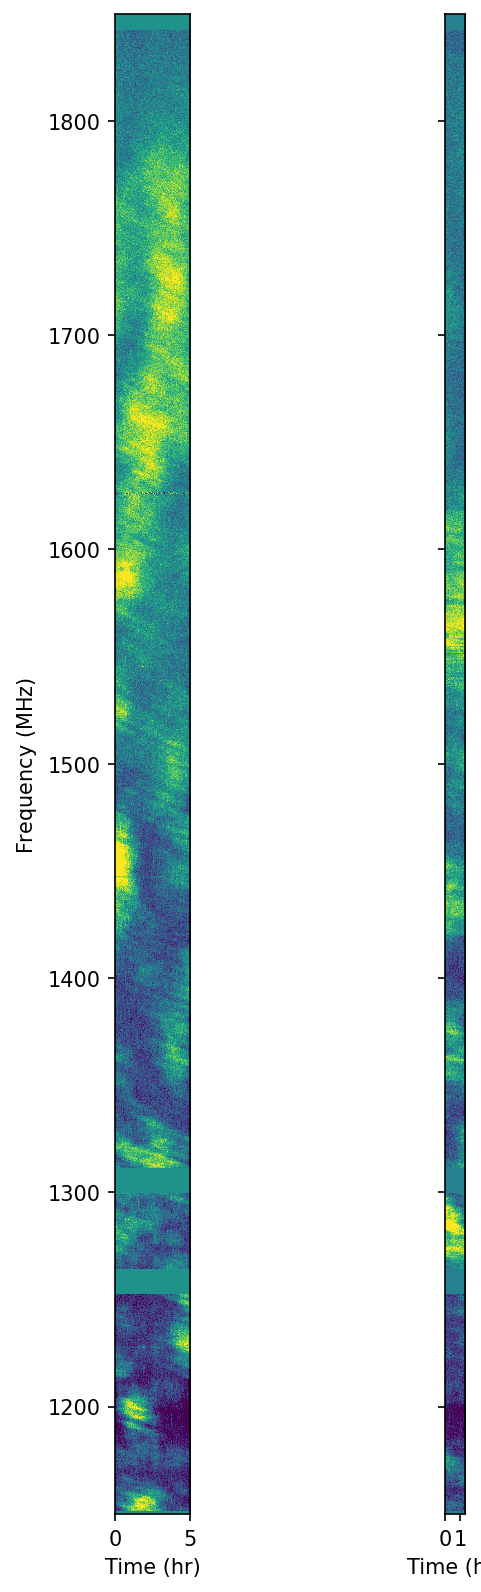

In [64]:
fig=plt.figure(figsize=(1,10))
rect1=[0.0,0.0,0.1*5.03,1]
fig.add_axes(rect1)
frame1=plt.gca()
spec_60554.plot_ds(new_fig=False)

rect2=[2.2,0.0,0.1*1.36,1]
fig.add_axes(rect2)
frame1=plt.gca()
spec_60555.plot_ds(new_fig=False)
frame1.axes.get_yaxis().set_tick_params(labelleft=False)
frame1.axes.set_ylabel('')

In [55]:
spec_60554.mjd[-1]

<Time object: scale='utc' format='mjd' value=60554.48747775115>

In [58]:
(spec_60555.mjd[0]-spec_60554.mjd[-1])*24

<TimeDelta object: scale='tai' format='jd' value=21.948260053934064>

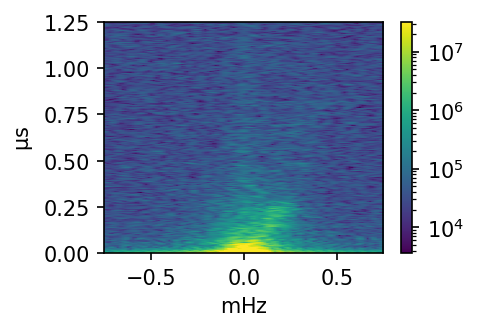

In [66]:
spec_60554.plot_ss(tau_lim=[0,1.25], fd_lim=[-0.75,0.75])

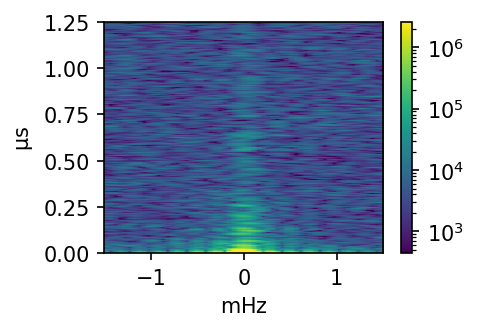

In [65]:
spec_60555.select(freq_sel=[1500*u.MHz,1800*u.MHz]).plot_ss(tau_lim=[0,1.25])

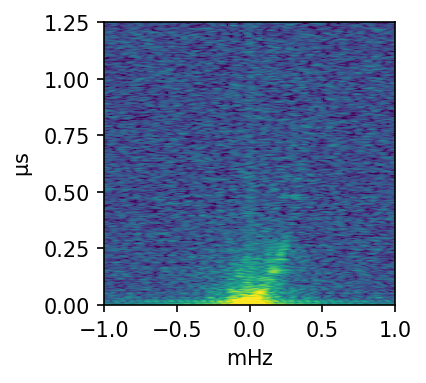

In [32]:
spec_60554.select(freq_sel=[1500*u.MHz,1800*u.MHz]).plot_ss(tau_lim=[0, 1.25], fd_lim=[-1,1],figsize=(2.5,2.45), cb=False)

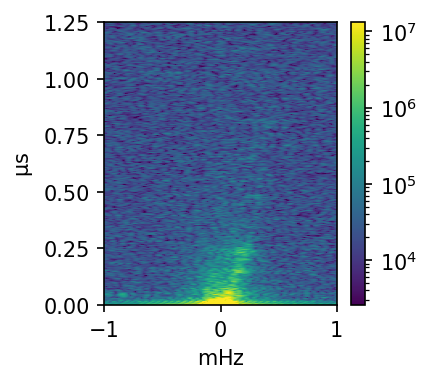

In [67]:
spec_60554.select(freq_sel=[1320*u.MHz,1800*u.MHz]).plot_ss(tau_lim=[0, 1.25], fd_lim=[-1,1],figsize=(2.5,2.45), cb=True)

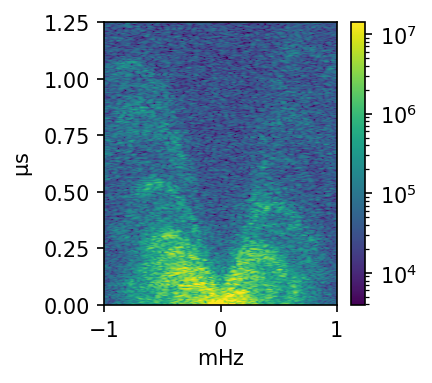

In [68]:
spec_59574.select(freq_sel=[1320*u.MHz,1800*u.MHz]).plot_ss(tau_lim=[0, 1.25], fd_lim=[-1,1],figsize=(2.5,2.45), cb=True)

In [20]:
spec_59574=gf.load_new_gbt(59574)

(2452, 2048)


In [ ]:
spec_59919.f

In [ ]:
spec_60454.plot_ds()

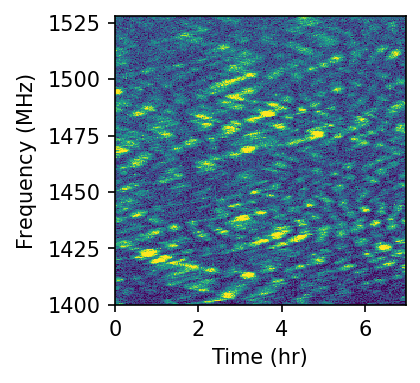

In [45]:
spec_59574.select(freq_sel=[1400*u.MHz,1528*u.MHz]).plot_ds(figsize=(2.5,2.5))
plt.savefig('psrj0337_ds_1400-1528MHz.pdf', format='pdf',bbox_inches='tight',dpi=150)

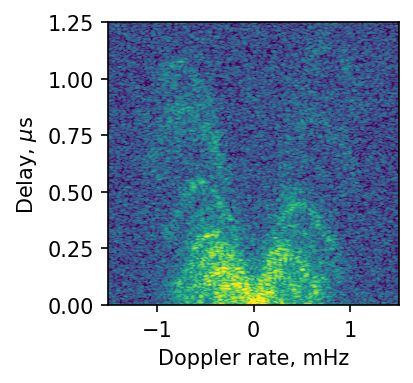

In [49]:
spec_59574.select(freq_sel=[1400*u.MHz,1600*u.MHz]).plot_ss(tau_lim=[0, 1.25], figsize=(2.5,2.45), cb=False)
plt.xlabel('Doppler rate, mHz')
plt.ylabel('Delay, $\mu$s')
plt.savefig('psrj0337_ss_1400-1528MHz.pdf', format='pdf',bbox_inches='tight',dpi=150)

In [ ]:
spec_60397.select(freq_sel=[1149.8*u.MHz,1300*u.MHz]).plot_ss()

In [ ]:
spec_59919=spec_59919.shrink([5,1])

In [ ]:
all_specs=[spec_59297,spec_59299,spec_59324,spec_59363,spec_59399,spec_59403,spec_59426,spec_59434,spec_59464,
           spec_59496,spec_59498,spec_59518,spec_59545,spec_59574,spec_59647,spec_59673,spec_59699,spec_59722,
           spec_59732,spec_59747,spec_59770,spec_59797,spec_59827,spec_59855,spec_59886,spec_59915,spec_59919,
           spec_59943,spec_60055]
most_specs=[spec_59299,spec_59324,spec_59363,spec_59399,spec_59403,spec_59496,spec_59498,spec_59518,spec_59545,
            spec_59574,spec_59647,spec_59673,spec_59699,spec_59722,spec_59732,spec_59747,spec_59770,spec_59827,
            spec_59855,spec_59886,spec_59915,spec_59919]

In [ ]:
def plot_one_ss(spec, fig, rect, tclr='k', put_ylabels=True, title_mjd=False):
    fig.add_axes(rect)
    frame1=plt.gca()
    spec.plot_ss(new_fig=False, tau_lim=[0.0,1.25], fd_lim=[-1.95,1.95], vmin=3e3,vmax=3e6, cb=False)
    if title_mjd is True:
        plt.title('%.2f'%spec.mjd[0].mjd, color=tclr)
    else:
        plt.title(spec.mjd.iso[int(len(spec.mjd.mjd)/2)][:10], color=tclr)
    if put_ylabels is False:
        frame1.axes.get_yaxis().set_tick_params(labelleft=False)
        frame1.axes.set_ylabel('')

In [ ]:
len(all_specs)

In [ ]:
fig=plt.figure(figsize=(10,1.7), dpi=150)
for i in range(0,len(all_specs)):
    #print (np.mean(all_specs[i].mjd.mjd), np.ptp(all_specs[i].mjd.mjd))
    if i%7 == 0:
        put_ylabels=True
    else:
        put_ylabels=False
    rect=[0.16*(i%7), -1.5*(i//7), 0.15, 1]
    fig.add_axes(rect)
    frame1=plt.gca()
    all_specs[i].select(freq_sel=[1149.8*u.MHz,1600*u.MHz]).plot_ds(new_fig=False)
    frame1.axes.get_yaxis().set_tick_params(labelleft=False)
    frame1.axes.set_ylabel('')
plt.show()

In [ ]:
fig=plt.figure(figsize=(10,1.7), dpi=150)
for i in range(0,len(all_specs)):
    #print (np.mean(all_specs[i].mjd.mjd), np.ptp(all_specs[i].mjd.mjd))
    if i%7 == 0:
        put_ylabels=True
    else:
        put_ylabels=False
    rect=[0.16*(i%7), -1.5*(i//7), 0.15, 1]
    fig.add_axes(rect)
    frame1=plt.gca()
    all_specs[i].select(freq_sel=[1600*u.MHz,1850*u.MHz]).plot_ds(new_fig=False)
    frame1.axes.get_yaxis().set_tick_params(labelleft=False)
    frame1.axes.set_ylabel('')
plt.show()

In [ ]:
fig=plt.figure(figsize=(10,1.7), dpi=150)
for i in range(0,len(all_specs)):
    #print (np.mean(all_specs[i].mjd.mjd), np.ptp(all_specs[i].mjd.mjd))
    if i%7 == 0:
        put_ylabels=True
    else:
        put_ylabels=False
    rect=[0.16*(i%7), -1.5*(i//7), 0.15, 1]
    fig.add_axes(rect)
    frame1=plt.gca()
    all_specs[i].select(freq_sel=[1600*u.MHz,1850*u.MHz]).plot_ss(new_fig=False)
    frame1.axes.get_yaxis().set_tick_params(labelleft=False)
    frame1.axes.set_ylabel('')
plt.show()

In [ ]:
fig=plt.figure(figsize=(10,1.7), dpi=150)
for i in range(0,len(all_specs)):
    #print (np.mean(all_specs[i].mjd.mjd), np.ptp(all_specs[i].mjd.mjd))
    if i%7 == 0:
        put_ylabels=True
    else:
        put_ylabels=False
    rect=[0.16*(i%7), -1.5*(i//7), 0.15, 1]
    fig.add_axes(rect)
    frame1=plt.gca()
    all_specs[i].select(freq_sel=[1100*u.MHz,1600*u.MHz]).plot_ss(new_fig=False)
    frame1.axes.get_yaxis().set_tick_params(labelleft=False)
    frame1.axes.set_ylabel('')
plt.show()

In [ ]:
t_clrs=['r','k','k','k','k','k','r','r','r','k','k','k','k','k','k','k','k','k','k',
       'k','k','r','k','k','k','k','k','r','r']
fig=plt.figure(figsize=(10,1.7), dpi=150)
for i in range(0,len(all_specs)-1):
    if t_clrs[i] == 'r': 
        print (np.mean(all_specs[i].mjd.mjd), np.ptp(all_specs[i].mjd.mjd))
    if i%7 == 0:
        put_ylabels=True
    else:
        put_ylabels=False
    plot_one_ss(all_specs[i], fig, rect=[0.16*(i%7), -1.5*(i//7), 0.15, 1], tclr=t_clrs[i],
               put_ylabels=put_ylabels, title_mjd=True)
plt.savefig('GBT_all_ss_v3_mjd.pdf', format='pdf',bbox_inches='tight',dpi=150)
plt.show()

In [ ]:
fig=plt.figure(figsize=(10,1.7), dpi=150)
for i in range(0,len(most_specs)):
    plot_one_ss(most_specs[i], fig, rect=[0.225*(i%6), -1.5*(i//6), 0.15, 1])
plt.show()

In [ ]:
def plot_gbt_dsss(spec, save_it=False, fd_lim=[-1.5,1.5], ds=True, new_fig=True, fig=None, ss_xst=0.3,
                 put_ylabels=True, plot_full_ss=True):
    if new_fig is True:
        fig=plt.figure(figsize=(7,7), dpi=150)
    if ds is True:
        fig.add_axes([0.0,0.0,0.2,1])
        frame1=plt.gca()
        spec.select(freq_sel=[1315*u.MHz,1840*u.MHz]).plot_ds(new_fig=False)
        plt.title('%.3f'%spec.mjd[0].mjd)
    if plot_full_ss is True:
        fig.add_axes([ss_xst,0.75,0.25,0.25])
        frame1=plt.gca()
        spec.plot_ss(new_fig=False,tau_lim=[0.0,1.22], fd_lim=fd_lim)
        plt.title('full SS\n %.1f - %.1f MHz'%(spec.f[0].value, spec.f[-1].value))
        if put_ylabels is False:
            frame1.axes.get_yaxis().set_tick_params(labelleft=False)
            frame1.axes.set_ylabel('')
    fig.add_axes([ss_xst,0.0,0.25,0.25])
    frame1=plt.gca()
    spec.select(freq_sel=[1315*u.MHz,1540*u.MHz]).plot_ss(new_fig=False,tau_lim=[0.0,1.22], fd_lim=fd_lim)
    if put_ylabels is False:
        frame1.axes.get_yaxis().set_tick_params(labelleft=False)
        frame1.axes.set_ylabel('')
    plt.title('%.1f SS\n 1315 - 1540 MHz'%spec.mjd[0].mjd)
    fig.add_axes([ss_xst,0.375,0.25,0.25])
    frame1=plt.gca()
    spec.select(freq_sel=[1540*u.MHz,1840*u.MHz]).plot_ss(new_fig=False,tau_lim=[0.0,1.22], fd_lim=fd_lim)
    if put_ylabels is False:
        frame1.axes.get_yaxis().set_tick_params(labelleft=False)
        frame1.axes.set_ylabel('')
    plt.title('%.1f SS\n 1540 - 1840 MHz'%spec.mjd[0].mjd)
    if save_it is True:
        mjd_name=int(np.mean(spec.mjd.mjd))
        plt.savefig('GBT_%s_ds_ss.png'%mjd_name, format='png',bbox_inches='tight',dpi=150)

In [ ]:
plot_gbt_dsss(spec_59574)
plot_gbt_dsss(spec_59647, fd_lim=[-0.75,0.75])
plot_gbt_dsss(spec_59732,fd_lim=[-2.5,2.5])
plot_gbt_dsss(spec_59747,fd_lim=[-2.5,2.5])
plot_gbt_dsss(spec_59770,fd_lim=[-2.5,2.5])
plot_gbt_dsss(spec_59827)
plot_gbt_dsss(spec_59855)
plot_gbt_dsss(spec_59886,fd_lim=[-2.5,2.5])
plot_gbt_dsss(spec_59915,fd_lim=[-2.5,2.5])
plot_gbt_dsss(spec_59919,fd_lim=[-2.5,2.5])
plot_gbt_dsss(spec_59943,fd_lim=[-2.5,2.5])
plot_gbt_dsss(spec_60055,fd_lim=[-2.5,2.5])

In [ ]:
def plot_ds_all(fig, spec, y_st, dur=5.77, ylabels=False):
    y_wid=((spec.mjd[-1]-spec.mjd[0]).to(u.hr).value)*0.2/dur
    fig.add_axes([y_st,0.0,y_wid,1])
    frame1=plt.gca()
    spec.select(freq_sel=[1315*u.MHz,1840*u.MHz]).plot_ds(new_fig=False)
    plt.title('%.1f'%spec.mjd[0].mjd)
    if ylabels is False:
        frame1.axes.get_yaxis().set_ticks([])
        plt.ylabel('')
    new_y_st=y_st+y_wid+0.005
    return new_y_st

In [ ]:
fig=plt.figure(figsize=(7,5), dpi=150)
y_st=plot_ds_all(fig, spec_59299, y_st=0.0, dur=5.77, ylabels=True)
y_st=plot_ds_all(fig, spec_59403, y_st=0.22)

In [ ]:
fig=plt.figure(figsize=(7,5), dpi=150)
#y_st=plot_ds_all(fig, spec_59299, y_st=0.0, dur=5.77, ylabels=True)
y_st=0
for i in range(0,15):
    y_st=plot_ds_all(fig, all_specs[i], y_st=y_st, ylabels=(i==0))

plt.savefig('GBT_ds_all_1.pdf', format='pdf',bbox_inches='tight',dpi=150)    
plt.show()
print (y_st)

fig=plt.figure(figsize=(7,5), dpi=150)
y_st=0
for i in range(15,29):
    y_st=plot_ds_all(fig, all_specs[i], y_st=y_st, ylabels=(i==15))

plt.savefig('GBT_ds_all_2.pdf', format='pdf',bbox_inches='tight',dpi=150)    
plt.show()
print (y_st)

In [ ]:
fig=plt.figure(figsize=(7,5), dpi=150)
dur_299=(spec_59299.mjd[-1]-spec_59299.mjd[0]).to(u.hr).value
fig.add_axes([0.0,0.0,0.2,1])
frame1=plt.gca()
spec_59299.select(freq_sel=[1315*u.MHz,1840*u.MHz]).plot_ds(new_fig=False)
plt.title('MJD: 59299')
y_st=0.2+0.02

y_wid=((spec_59403.mjd[-1]-spec_59403.mjd[0]).to(u.hr).value)*0.2/dur_299
fig.add_axes([y_st,0.0,y_wid,1])
frame1=plt.gca()
spec_59403.select(freq_sel=[1315*u.MHz,1840*u.MHz]).plot_ds(new_fig=False)
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('')
plt.title('MJD: 59403')
y_st=y_st+y_wid+0.02

y_wid=((spec_59498.mjd[-1]-spec_59498.mjd[0]).to(u.hr).value)*0.2/dur_299
fig.add_axes([y_st,0.0,y_wid,1])
frame1=plt.gca()
spec_59498.select(freq_sel=[1315*u.MHz,1840*u.MHz]).plot_ds(new_fig=False)
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('')
plt.title('MJD: 59498')
y_st=y_st+y_wid+0.02

y_wid=((spec_59574.mjd[-1]-spec_59574.mjd[0]).to(u.hr).value)*0.2/dur_299
fig.add_axes([y_st,0.0,y_wid,1])
frame1=plt.gca()
spec_59574.select(freq_sel=[1315*u.MHz,1840*u.MHz]).plot_ds(new_fig=False)
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('')
plt.title('MJD: 59575')
y_st=y_st+y_wid+0.02

y_wid=((spec_59647.mjd[-1]-spec_59647.mjd[0]).to(u.hr).value)*0.2/dur_299
fig.add_axes([y_st,0.0,y_wid,1])
frame1=plt.gca()
spec_59647.select(freq_sel=[1315*u.MHz,1840*u.MHz]).plot_ds(new_fig=False)
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('')
plt.title('MJD: 59647')
y_st=y_st+y_wid+0.02

y_wid=((spec_59732.mjd[-1]-spec_59732.mjd[0]).to(u.hr).value)*0.2/dur_299
fig.add_axes([y_st,0.0,y_wid,1])
frame1=plt.gca()
spec_59732.select(freq_sel=[1315*u.MHz,1840*u.MHz]).plot_ds(new_fig=False)
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('')
plt.title('MJD: 59732')
y_st=y_st+y_wid+0.02

y_wid=((spec_59827.mjd[-1]-spec_59827.mjd[0]).to(u.hr).value)*0.2/dur_299
fig.add_axes([y_st,0.0,y_wid,1])
frame1=plt.gca()
spec_59827.select(freq_sel=[1315*u.MHz,1840*u.MHz]).plot_ds(new_fig=False)
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('')
plt.title('MJD: 59827')
y_st=y_st+y_wid+0.02

y_wid=((spec_59919.mjd[-1]-spec_59919.mjd[0]).to(u.hr).value)*0.2/dur_299
fig.add_axes([y_st,0.0,y_wid,1])
frame1=plt.gca()
spec_59919.select(freq_sel=[1315*u.MHz,1840*u.MHz]).plot_ds(new_fig=False)
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('')
plt.title('MJD: 59919')
plt.savefig('GBT_long_ds_v3.pdf', format='pdf',bbox_inches='tight',dpi=150)

In [ ]:
spec_59647.plot_ss(figsize=(6,2), tau_lim=[0.0,1.25])

In [ ]:
fig=plt.figure(figsize=(7,7), dpi=150)
di=0.29
plot_gbt_dsss(spec_59299, ds=False, new_fig=False, fig=fig, ss_xst=0.0, fd_lim=[-0.9,0.9],
             plot_full_ss=False)

plot_gbt_dsss(spec_59403, ds=False, new_fig=False, fig=fig, ss_xst=di, fd_lim=[-0.9,0.9], put_ylabels=False,
             plot_full_ss=False)

plot_gbt_dsss(spec_59498, ds=False, new_fig=False, fig=fig, ss_xst=di*2, fd_lim=[-0.9,0.9], put_ylabels=False,
             plot_full_ss=False)

plot_gbt_dsss(spec_59574, ds=False, new_fig=False, fig=fig, ss_xst=di*3, fd_lim=[-1.3,1.3], put_ylabels=False,
             plot_full_ss=False)

plt.savefig('GBT_long_ss_v4_1.pdf', format='pdf',bbox_inches='tight',dpi=150)
fig=plt.figure(figsize=(7,7), dpi=150)

plot_gbt_dsss(spec_59647, ds=False, new_fig=False, fig=fig, ss_xst=di*4, fd_lim=[-0.7,0.7], put_ylabels=False,
             plot_full_ss=False)

plot_gbt_dsss(spec_59732, ds=False, new_fig=False, fig=fig, ss_xst=di*5, fd_lim=[-1.7,1.7], put_ylabels=False,
             plot_full_ss=False)

plot_gbt_dsss(spec_59827, ds=False, new_fig=False, fig=fig, ss_xst=di*6, fd_lim=[-0.32,0.32], put_ylabels=False,
             plot_full_ss=False)

plot_gbt_dsss(spec_59919, ds=False, new_fig=False, fig=fig, ss_xst=di*7, fd_lim=[-2.1,2.1], put_ylabels=False,
             plot_full_ss=False)
plt.savefig('GBT_long_ss_v4_2.pdf', format='pdf',bbox_inches='tight',dpi=150)

# Do the fit

In [ ]:
res_324=gf.fit_new_gbt(spec_59324,ntime=1, nfreq=9, freq_start=1312*u.MHz, freq_step=59*u.MHz)

In [ ]:
1312+59*9

In [ ]:
res_574=gf.fit_new_gbt(spec_59574,ntime=4, nfreq=9, freq_start=1312*u.MHz, freq_step=59*u.MHz)

In [ ]:
res_647=gf.fit_new_gbt(spec_59647,ntime=3, nfreq=9, par_lims=[0.05,1],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s.pickle'%(np.mean(spec_59647.mjd.mjd),spec_59647.tel), 'wb') as e:
    pickle.dump(res_647, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_647_eigv=gf.fit_new_gbt(spec_59647,ntime=3, nfreq=9, par_lims=[0.05,1],freq_start=1312*u.MHz,
                            freq_step=59*u.MHz,thth_method='coherent', chi2_method='Eigen')
with open('res_coh_Eigv_%.2f_%s.pickle'%(np.mean(spec_59647.mjd.mjd),spec_59647.tel), 'wb') as e:
    pickle.dump(res_647_eigv, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_647_inc=gf.fit_new_gbt(spec_59647,ntime=3, nfreq=9, par_lims=[0.05,1],freq_start=1312*u.MHz,
                            freq_step=59*u.MHz,thth_method='incoherent')
with open('res_inc_%.2f_%s.pickle'%(np.mean(spec_59647.mjd.mjd),spec_59647.tel), 'wb') as e:
    pickle.dump(res_647_inc, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_673=gf.fit_new_gbt(spec_59673,ntime=1, nfreq=9,par_lims=[0.25,1.25],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s_2.pickle'%(np.mean(spec_59673.mjd.mjd),spec_59673.tel), 'wb') as e:
    pickle.dump(res_673, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_699=gf.fit_new_gbt(spec_59699,ntime=1, nfreq=9,par_lims=[0.75,1.75],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s.pickle'%(np.mean(spec_59699.mjd.mjd),spec_59699.tel), 'wb') as e:
    pickle.dump(res_699, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_722=gf.fit_new_gbt(spec_59722,ntime=1,nfreq=9, par_lims=[1.0,2.0],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s.pickle'%(np.mean(spec_59722.mjd.mjd),spec_59722.tel), 'wb') as e:
    pickle.dump(res_722, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_732=gf.fit_new_gbt(spec_59732,ntime=5,nfreq=9, par_lims=[0.75,1.75],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s_nt5.pickle'%(np.mean(spec_59732.mjd.mjd),spec_59732.tel), 'wb') as e:
    pickle.dump(res_732, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_747=gf.fit_new_gbt(spec_59747,ntime=1,nfreq=9, par_lims=[1.0,2.0],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s.pickle'%(np.mean(spec_59747.mjd.mjd),spec_59747.tel), 'wb') as e:
    pickle.dump(res_747, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_770=gf.fit_new_gbt(spec_59770,ntime=1,nfreq=9, par_lims=[0.75,1.75],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s.pickle'%(np.mean(spec_59770.mjd.mjd),spec_59770.tel), 'wb') as e:
    pickle.dump(res_770, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_827=gf.fit_new_gbt(spec_59827,ntime=1,nfreq=9, par_lims=[0.1,0.6],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s_nt1.pickle'%(np.mean(spec_59827.mjd.mjd),spec_59827.tel), 'wb') as e:
    pickle.dump(res_827, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_855=gf.fit_new_gbt(spec_59855,ntime=1,nfreq=9, par_lims=[0.4,1.4],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s.pickle'%(np.mean(spec_59855.mjd.mjd),spec_59855.tel), 'wb') as e:
    pickle.dump(res_855, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_886=gf.fit_new_gbt(spec_59886,ntime=2,nfreq=9, par_lims=[0.75,2.25],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s_nt2.pickle'%(np.mean(spec_59886.mjd.mjd),spec_59886.tel), 'wb') as e:
    pickle.dump(res_886, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_915=gf.fit_new_gbt(spec_59915,ntime=2,nfreq=9, par_lims=[1.28,2.4],freq_start=1312*u.MHz, freq_step=59*u.MHz,
                      edge=2.0)
with open('res_coh_%.2f_%s_nt2.pickle'%(np.mean(spec_59915.mjd.mjd),spec_59915.tel), 'wb') as e:
    pickle.dump(res_915, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_919=gf.fit_new_gbt(spec_59919,ntime=4,nfreq=9, par_lims=[1.2,2.8],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s_nt4.pickle'%(np.mean(spec_59919.mjd.mjd),spec_59919.tel), 'wb') as e:
    pickle.dump(res_919, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_919=gf.fit_new_gbt(spec_59919,ntime=6,nfreq=9, par_lims=[1.2,2.8],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s_nt6.pickle'%(np.mean(spec_59919.mjd.mjd),spec_59919.tel), 'wb') as e:
    pickle.dump(res_919, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_919=gf.fit_new_gbt(spec_59919,ntime=5,nfreq=9, par_lims=[1.2,2.8],freq_start=1312*u.MHz, freq_step=59*u.MHz,
                      edge=2.0)
with open('res_coh_%.2f_%s_nt5.pickle'%(np.mean(spec_59919.mjd.mjd),spec_59919.tel), 'wb') as e:
    pickle.dump(res_919, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
#os.system('mv fit_overview_mjd59919* dir_59919_nt5/.')

In [ ]:
res_919=gf.fit_new_gbt(spec_59919,ntime=7,nfreq=9, par_lims=[1.2,2.8],freq_start=1312*u.MHz, freq_step=59*u.MHz,
                      edge=2.0)
with open('res_coh_%.2f_%s_nt7.pickle'%(np.mean(spec_59919.mjd.mjd),spec_59919.tel), 'wb') as e:
    pickle.dump(res_919, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
#os.system('mv fit_overview_mjd59919* dir_59919_nt7/.')

In [ ]:
res_919=gf.fit_new_gbt(spec_59919,ntime=8,nfreq=9, par_lims=[1.2,2.7],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s_nt8.pickle'%(np.mean(spec_59919.mjd.mjd),spec_59919.tel), 'wb') as e:
    pickle.dump(res_919, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_919=gf.fit_new_gbt(spec_59919,ntime=9,nfreq=9, par_lims=[1.2,2.7],freq_start=1312*u.MHz, freq_step=59*u.MHz,
                      edge=2.0)
with open('res_coh_%.2f_%s_nt9.pickle'%(np.mean(spec_59919.mjd.mjd),spec_59919.tel), 'wb') as e:
    pickle.dump(res_919, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
#os.system('mv fit_overview_mjd59919* dir_59919_nt9/.')

In [ ]:
res_919=gf.fit_new_gbt(spec_59919,ntime=11,nfreq=9, par_lims=[1.2,2.7],freq_start=1312*u.MHz, freq_step=59*u.MHz,
                      edge=2.0)
with open('res_coh_%.2f_%s_nt11.pickle'%(np.mean(spec_59919.mjd.mjd),spec_59919.tel), 'wb') as e:
    pickle.dump(res_919, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
#os.system('mv fit_overview_mjd59919* dir_59919_nt11/.')

In [ ]:
res_574=gf.fit_new_gbt(spec_59574,ntime=5, nfreq=18, par_lims=[0.5,1.5],freq_start=1312*u.MHz, freq_step=29*u.MHz,
                      figaux='_fs29_nt5')
with open('try_res_coh_%.2f_%s.pickle'%(np.mean(spec_59574.mjd.mjd),spec_59574.tel), 'wb') as e:
    pickle.dump(res_574, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_299=gf.fit_new_gbt(spec_59299,ntime=4, nfreq=18, par_lims=[0.5,2],freq_start=1312*u.MHz,
                       freq_step=29*u.MHz, figaux='_fs29')
with open('try_res_coh_%.2f_%s.pickle'%(np.mean(spec_59299.mjd.mjd),spec_59299.tel), 'wb') as e:
    pickle.dump(res_299, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_574=gf.fit_new_gbt(spec_59574,ntime=4, nfreq=18, par_lims=[0.5,1.5],freq_start=1312*u.MHz, freq_step=29*u.MHz)
with open('try_res_coh_%.2f_%s.pickle'%(np.mean(spec_59574.mjd.mjd),spec_59574.tel), 'wb', figaux='_fs29') as e:
    pickle.dump(res_574, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_574=gf.fit_new_gbt(spec_59574,ntime=4, nfreq=9, par_lims=[0.5,1.5],freq_start=1312*u.MHz, freq_step=59*u.MHz,
                      thth_method='coherent', chi2_method='Eigen', plot_thth=True)
with open('try_res_coh_Eigv%.2f_%s.pickle'%(np.mean(spec_59574.mjd.mjd),spec_59574.tel), 'wb') as e:
    pickle.dump(res_574, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_574=gf.fit_new_gbt(spec_59574,ntime=4, nfreq=9, par_lims=[0.5,1.5],freq_start=1312*u.MHz, freq_step=59*u.MHz,
                      thth_method='incoherent', plot_thth=True, mean0=False)
with open('try_res_inc_%.2f_%s_mean0False.pickle'%(np.mean(spec_59574.mjd.mjd),spec_59574.tel), 'wb') as e:
    pickle.dump(res_574, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_574=gf.fit_new_gbt(spec_59574,ntime=3, nfreq=4, par_lims=[0.5,1.5],freq_start=1312*u.MHz, freq_step=133*u.MHz,
                      thth_method='incoherent', plot_thth=True)
with open('try_res_inc_%.2f_%s.pickle'%(np.mean(spec_59574.mjd.mjd),spec_59574.tel), 'wb') as e:
    pickle.dump(res_574, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
res_574=gf.fit_new_gbt(spec_59574,ntime=4, nfreq=2, par_lims=[0.5,1.5],freq_start=1312*u.MHz, freq_step=266*u.MHz,
                      thth_method='incoherent', plot_thth=True, mean0=True, figaux='_mean0T')

In [ ]:
res_722=gf.fit_new_gbt(spec_59722,ntime=1,nfreq=9, par_lims=[1.0,2.0],freq_start=1312*u.MHz, freq_step=59*u.MHz)
with open('res_coh_%.2f_%s.pickle'%(np.mean(spec_59722.mjd.mjd),spec_59722.tel), 'wb') as e:
    pickle.dump(res_722, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
most_specs=[spec_59299,spec_59324,spec_59363,spec_59399,spec_59403,
           spec_59496,spec_59498,spec_59518,spec_59545,spec_59574]

ntimes=[4,1,1,1,4,1,4,1,1,4]

In [ ]:
for i in range(0,len(most_specs)):
    this_sp=most_specs[i]
    this_res=gf.fit_new_gbt(this_sp,ntime=ntimes[i], nfreq=9, freq_start=1312*u.MHz, freq_step=59*u.MHz)
    with open('res_coh_%.2f_%s.pickle'%(np.mean(this_sp.mjd.mjd),this_sp.tel), 'wb') as e:
        pickle.dump(this_res, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
for i in range(0,len(most_specs)):
    this_sp=most_specs[i]
    this_res=gf.fit_new_gbt(this_sp,ntime=ntimes[i], nfreq=9, freq_start=1312*u.MHz, freq_step=59*u.MHz,
                           thth_method='incoherent')
    with open('res_inc_%.2f_%s.pickle'%(np.mean(this_sp.mjd.mjd),this_sp.tel), 'wb') as e:
        pickle.dump(this_res, e, pickle.HIGHEST_PROTOCOL)

In [ ]:
for i in range(0,len(most_specs)):
    this_sp=most_specs[i]
    this_res=gf.fit_new_gbt(this_sp,ntime=ntimes[i], nfreq=9, freq_start=1312*u.MHz, freq_step=59*u.MHz,
                           thth_method='coherent', chi2_method='Eigen')
    with open('res_coh_Eigv_%.2f_%s.pickle'%(np.mean(this_sp.mjd.mjd),this_sp.tel), 'wb') as e:
        pickle.dump(this_res, e, pickle.HIGHEST_PROTOCOL)

# Save results

In [ ]:
#with open('res_coh_%.2f_%s.pickle'%(np.mean(spec_59574.mjd.mjd),spec_59574.tel), 'wb') as e:
#    pickle.dump(res_574, e, pickle.HIGHEST_PROTOCOL)

# Load pickles

In [ ]:
list_pickles = sorted(glob('res_coh_59*.pickle'))
list_pickles

In [ ]:
res_this = pickle.load(open( 'res_coh_59732.65_GBT_nt5.pickle', 'rb'))
res_this

In [ ]:
colors=['b', 'r', 'k', 'g', 'grey', 'cyan', 'm', 'y', 'dodgerblue', 'orange', 'lime']
for i in range(0,len(list_pickles)):
    plt.figure(figsize=(4,2))
    res_this = pickle.load(open( list_pickles[i], 'rb'))
    for k in range(0, len(res_this['times'])):
        print(res_this['times'][k])
        plt.plot(res_this['freqs'],res_this['dveffs'][k], marker='o', color=colors[k])
        plt.axhline(np.mean(res_this['dveffs'][k]), color=colors[k], ls=':')
    plt.ylim(0.0,3.5)
    plt.title(list_pickles[i])
    plt.show()
    


In [ ]:
res_this

# Examine results

In [ ]:
def plot_veff_freq(dic, plt_lim=None, plt_legend=True):
    colors=['k', 'r', 'b', 'c']
    for i in range(0,len(dic['times'])):
        new_mask=np.array(res_this['masks'][i,:], dtype=bool)
        plt.errorbar(dic['freqs'][new_mask],dic['dveffs'][i,:][new_mask], yerr=dic['dveff_e'][i,:][new_mask],
                     ls='none',marker='o',label='%.2f'%dic['times'][i], color=colors[i], alpha=0.75, ms=4)
        plt.axhline(np.mean(dic['dveffs'][i,:][new_mask]), ls=':', color=colors[i])
    if plt_legend is True:
        plt.legend(loc='upper left', fontsize=6)
    if plt_lim is not None:
        plt.ylim(plt_lim[0],plt_lim[1])
    plt.xlim(1300,1850)
    plt.ylabel(r'scaled $v_{eff}$ ($\frac{km/s}{\sqrt{pc}}$)')
    plt.xlabel('Frequency (MHz)')
    #plt.show()

     
def plot_chi2s(dic):
    for i in range(0,np.shape(dic['dveff_chi2'])[0]):
        for k in range(0,np.shape(dic['dveff_chi2'])[1]):
            plt.plot(dic['dveff_ar'][i,k,:],dic['dveff_chi2'][i,k,:], ls=':', lw=1,
                     label='%.2f'%dic['freqs'][k])
        plt.plot(dic['dveff_ar'][i,k,:],np.mean(dic['dveff_chi2'][i,:,:], axis=0), color='k', ls='-', lw=2,
                     label='mean')
        plt.title(dic['times'][i])
        plt.legend(loc=(1.01,0.2))
        plt.show()

        

In [ ]:
list_pickles

In [ ]:
 'res_coh_59827.41_GBT_nt5.pickle'

In [ ]:
fig=plt.figure(figsize=(10,1.5), dpi=150)
plt_lims=np.array([[0.5,1.9],[0.3,1.7],[0.9,2.3],[0.6,2.0],[0.3,1.7],[0.9,2.3],[0.5,1.9],[1.0,2.4],[1.0,2.4],
                  [0.5,1.9],[0.0,1.4]])
for i in range(0,len(list_pickles)):
    res_this = pickle.load(open(list_pickles[i], 'rb'))
    rect=[0.225*(i%4), -1.5*(i//4), 0.15, 1]
    fig.add_axes(rect)
    frame1=plt.gca()
    plot_veff_freq(res_this, plt_lim=[0.2,2.75], plt_legend=True)
plt.savefig('GBT_all_veffs_v2.pdf', format='pdf',bbox_inches='tight',dpi=150)
plt.show()

In [ ]:
plt_lims[9,:]

In [ ]:
plt_lim=[plt_lims[9,0],plt_lims[9,1]]
plt_lim